# What is a Guassian Distribution?

In statistics, a normal distribution (a bell shaped curve) is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is

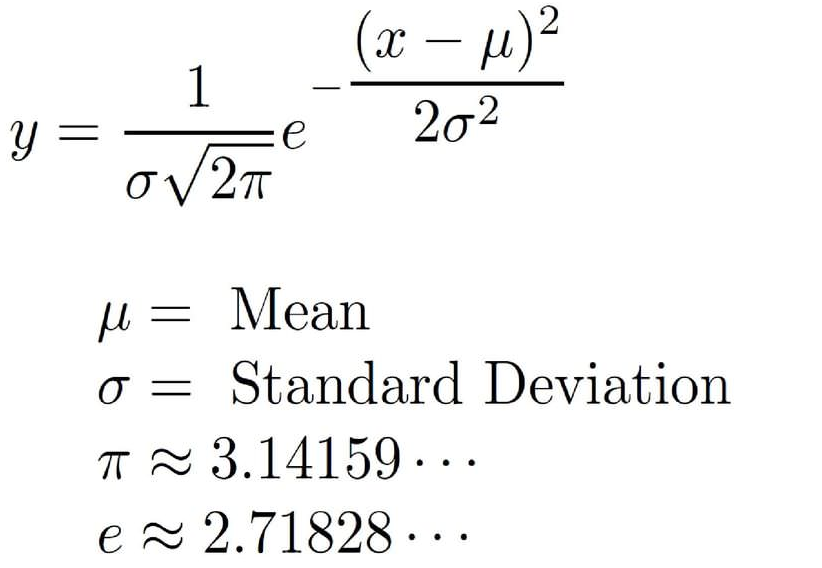

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Gaussian Mixture Model:

Gaussian mixture models are a probabilistic model for representing normally distributed subpopulations within an overall population. Mixture models in general don't require knowing which subpopulation a data point belongs to, allowing the model to learn the subpopulations automatically. Since subpopulation assignment is not known, this constitutes a form of unsupervised learning.


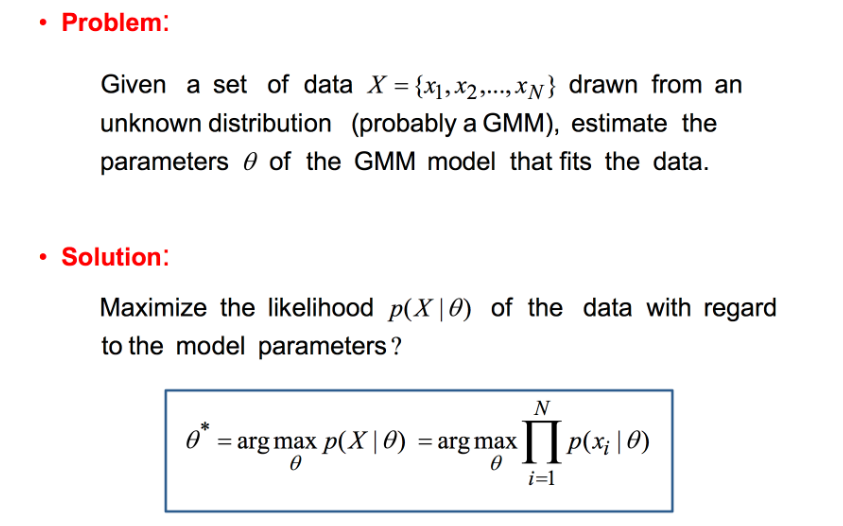

For One Dimesional Model:

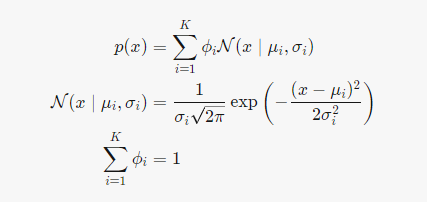

# Lets try to understand the equation

Mu (μi) : mean of data

Sigma (σi): Standard Deviation

Phi (ϕi): It is the initial guess probabilty of a datapoint belongs from the Normal distribution when our parameters are mu and sigma.


K: number of components we want to distribute our data.

P(x): is the Probability density function which tells us the probability of a datapoint present in a specific Gaussian.

### Note:
In above equation the sum of phi is 1 becuase as we know that the total probability always equal to 1.

# Expectation Maximization Algorithm

Expectation maximization algorithm is a unsupevised technique which uses Maximum Likelihood estimation to calculate the best parameters (theta) which maximizes the probability density function.

There are two steps in this algorithm.

1) Expectation: First we calculate the probability of a datapoint x belongs to a gaussain distribution when our model parameters are  mu, sigma and lambda.

2) Maximization: Here we try to maximize the model probability by estimating the new parameters which best fits on our model.


​
 

# Problem:

Suppose we have vector X={x1,x2,x3....xn} of trimodal distribution. Where our K=3 (K refers to as cluster) N=3000 is number of datapoints. Select the parameters from distribution randomly.



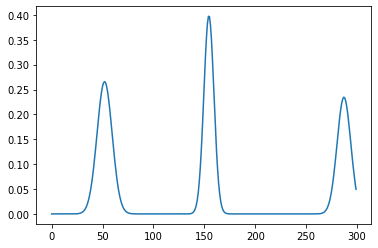

In [45]:
x1 = np.linspace(start=-10, stop=10, num=100)
x2 = np.linspace(start=-10,stop=10,num=100)
x3 = np.linspace(start=-20,stop=5,num=100)

#A normal continuous random variable.
#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
y1 = stats.norm.pdf(x1, loc=0.5, scale=1.5) 
y2 = stats.norm.pdf(x2,loc=1, scale=1)
y3 = stats.norm.pdf(x3,loc=2,scale=1.7)

X = np.concatenate([y1,y2,y3])

plt.plot(X)
plt.show()

# Equation for Expectation:

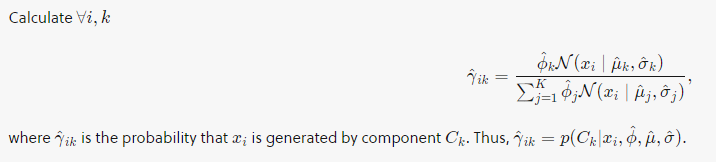

###  Here phi represent the mixing coefficient or initial propability

# Equations for Maximization:


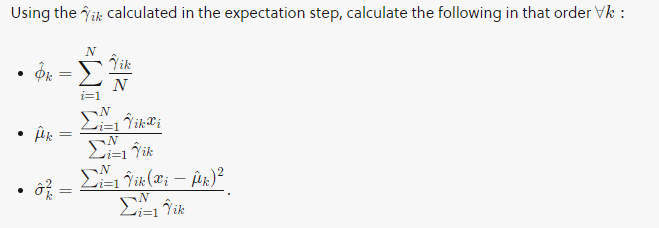

### These are equation for updating the parameters which we first intialized but what we get from this? This maximization steps helps us to converge the problem.how do we know that our function is converging?

### We just have to take log of our probability density function if it satisfied the criteria stop the algorithm if not them repeat the Expectation step.

In [50]:
class ExpectedMaximization:

  def __init__(self,data,thresh):
    
    self.sigma = np.random.choice(data,size=3) - np.mean(data)
    self.mu = np.random.choice(data,size=3) 

    self.phi = np.random.choice(data,size=3)
    self._clusters = 3
    self.data=data
    self.thresh=thresh


    # set log likelihood parameter with 0
    self.loglike = 0.0

    self.iter = 0


  # Calculate the N(x|mu,sigma)
  def norm(self,sigma,mu,datapoint):

    exp_term = np.exp(- ((datapoint-mu)**2 )/ 2*sigma**2)

    return (1/(sigma*(np.sqrt(2*np.pi))))*exp_term

  # PDF: such that x belongs to a particluar gaussain
  def pdf(self,datapoint,sigma_,mu_,phi):

    return self.norm(sigma_,mu_,datapoint) * phi\
             / sum(self.norm(self.sigma[k],self.mu[k],datapoint)*self.phi[k] for k in range(self._clusters))



  def ExpectationStep(self):

    pdf1 = 0
    pdf2 = 0
    pdf3 = 0
    
    for datapoint in self.data:
      pdf1 = self.pdf(datapoint,self.sigma[0],self.mu[0],self.phi[0])
      

      pdf2 = self.pdf(datapoint,self.sigma[1],self.mu[1],self.phi[1])

      pdf3 = self.pdf(datapoint,self.sigma[2],self.mu[2], self.phi[2])
    
    self.loglike += np.log(pdf1+pdf2+pdf3)
    


    return (pdf1,pdf2,pdf3)
    


      
        


  
  def MaximizationStep(self):
    
    # here we get the probability denstity function a single datapoint in different gaussians
    pdf1,pdf2,pdf3 = self.ExpectationStep()
    

    # if our loglike is less than thresh than we simply break the algorithm
    if self.loglike<self.thresh:
      return None


    print(f'\nPDF1 {pdf1}, PDF2:{pdf2}, PDF{pdf3}')
    print(f'\nLogLike: {self.loglike}')
    # Update the phi term
    self.phi[0] = pdf1/len(self.data)
    self.phi[1] = pdf2/len(self.data)
    self.phi[2] = pdf3/len(self.data)
    
    # Update the Means
    self.mu[0] = sum((pdf1 * xi) /pdf1 for xi in self.data)
    self.mu[1] = sum((pdf2 * xi) /pdf2 for xi in self.data)
    self.mu[2] = sum((pdf3 * xi) /pdf3 for xi in self.data)
    
    # Update the sigma
    self.sigma[0] = np.sqrt(sum(pdf1 * (xi - self.mu[0])**2 for xi in self.data)/pdf1)
    self.sigma[1] = np.sqrt(sum(pdf2 * (xi - self.mu[1])**2 for xi in self.data)/pdf2)
    self.sigma[2] = np.sqrt(sum(pdf3 * (xi - self.mu[2])**2 for xi in self.data)/pdf3)

    

    
  

    
  def run(self,iteration):
    for i in range(iteration):
      print('ExpectedMaximization(Mean: {}, Sigma:{}, Mixing Coefficient: {})'.format(self.mu, self.sigma,self.phi))
      if self.MaximizationStep() is None:
        break



In [52]:
model = ExpectedMaximization(X,-2e15)

In [53]:
model.run(3)

ExpectedMaximization(Mean: [4.20282115e-18 2.12447232e-06 1.28099623e-01], Sigma:[-0.04576658  0.16575867 -0.04160907], Mixing Coefficient: [0.00035595 0.12853847 0.21415046])

PDF1 0.00177606628832159, PDF2:-0.1770772480270633, PDF1.1753011817387418

LogLike: 0.0


# Resource:

https://brilliant.org/wiki/gaussian-mixture-model/

https://machinelearningmastery.com/expectation-maximization-em-algorithm/

In [24]:
2e-14